# Importing Libraries

In [1]:
!pip install nltk==3.6.7 --user
!pip install gensim==4.1.2 --user

In [2]:
import gensim
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
%matplotlib inline

# Data Pre-processing and Tokenization

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91798\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91798\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91798\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
course_url = "C:/Users/91798/E-Learning Recommendation System/courses.csv"
course_content_df = pd.read_csv(course_url)

In [5]:
course_content_df.iloc[0, :]

COURSE_ID                                               ML0201EN
TITLE          robots are coming  build iot apps with watson ...
DESCRIPTION    have fun with iot and learn along the way  if ...
Name: 0, dtype: object

In [6]:
course_content_df['course_texts'] = course_content_df[['TITLE', 'DESCRIPTION']].agg(' '.join, axis=1)
course_content_df = course_content_df.reset_index()
course_content_df['index'] = course_content_df.index
course_content_df.iloc[0, :]

index                                                           0
COURSE_ID                                                ML0201EN
TITLE           robots are coming  build iot apps with watson ...
DESCRIPTION     have fun with iot and learn along the way  if ...
course_texts    robots are coming  build iot apps with watson ...
Name: 0, dtype: object

In [7]:
def tokenize_course(course, keep_only_nouns=True):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(course)
    # Remove English stop words and numbers
    word_tokens = [w for w in word_tokens if (not w.lower() in stop_words) and (not w.isnumeric())]
    # Only keep nouns 
    if keep_only_nouns:
        filter_list = ['WDT', 'WP', 'WRB', 'FW', 'IN', 'JJR', 'JJS', 'MD', 'PDT', 'POS', 'PRP', 'RB', 'RBR', 'RBS',
                       'RP']
        tags = nltk.pos_tag(word_tokens)
        word_tokens = [word for word, pos in tags if pos not in filter_list]

    return word_tokens

In [8]:
a_course = course_content_df.iloc[0, :]['course_texts']
a_course

'robots are coming  build iot apps with watson  swift  and node red have fun with iot and learn along the way  if you re a swift developer and want to learn more about iot and watson ai services in the cloud  raspberry pi   and node red  you ve found the right place  you ll build iot apps to read temperature data  take pictures with a raspcam  use ai to recognize the objects in those pictures  and program an irobot create 2 robot  '

In [9]:
tokenize_course(a_course)

['robots',
 'coming',
 'build',
 'iot',
 'apps',
 'watson',
 'swift',
 'red',
 'fun',
 'iot',
 'learn',
 'way',
 'swift',
 'developer',
 'want',
 'learn',
 'iot',
 'watson',
 'ai',
 'services',
 'cloud',
 'raspberry',
 'pi',
 'node',
 'red',
 'found',
 'place',
 'build',
 'iot',
 'apps',
 'read',
 'temperature',
 'data',
 'take',
 'pictures',
 'raspcam',
 'use',
 'ai',
 'recognize',
 'objects',
 'pictures',
 'program',
 'irobot',
 'create',
 'robot']

In [10]:
tokenized_courses = [tokenize_course(course_text) for course_text in course_content_df['course_texts']]
tokenized_courses[:1]

[['robots',
  'coming',
  'build',
  'iot',
  'apps',
  'watson',
  'swift',
  'red',
  'fun',
  'iot',
  'learn',
  'way',
  'swift',
  'developer',
  'want',
  'learn',
  'iot',
  'watson',
  'ai',
  'services',
  'cloud',
  'raspberry',
  'pi',
  'node',
  'red',
  'found',
  'place',
  'build',
  'iot',
  'apps',
  'read',
  'temperature',
  'data',
  'take',
  'pictures',
  'raspcam',
  'use',
  'ai',
  'recognize',
  'objects',
  'pictures',
  'program',
  'irobot',
  'create',
  'robot']]

In [11]:
tokens_dict = gensim.corpora.Dictionary(tokenized_courses)
tokens_dict.token2id

{'ai': 0,
 'apps': 1,
 'build': 2,
 'cloud': 3,
 'coming': 4,
 'create': 5,
 'data': 6,
 'developer': 7,
 'found': 8,
 'fun': 9,
 'iot': 10,
 'irobot': 11,
 'learn': 12,
 'node': 13,
 'objects': 14,
 'pi': 15,
 'pictures': 16,
 'place': 17,
 'program': 18,
 'raspberry': 19,
 'raspcam': 20,
 'read': 21,
 'recognize': 22,
 'red': 23,
 'robot': 24,
 'robots': 25,
 'services': 26,
 'swift': 27,
 'take': 28,
 'temperature': 29,
 'use': 30,
 'want': 31,
 'watson': 32,
 'way': 33,
 'accelerate': 34,
 'accelerated': 35,
 'accelerating': 36,
 'analyze': 37,
 'based': 38,
 'benefit': 39,
 'caffe': 40,
 'case': 41,
 'chips': 42,
 'classification': 43,
 'comfortable': 44,
 'complex': 45,
 'computations': 46,
 'convolutional': 47,
 'course': 48,
 'datasets': 49,
 'deep': 50,
 'dependencies': 51,
 'deploy': 52,
 'designed': 53,
 'feel': 54,
 'google': 55,
 'gpu': 56,
 'hardware': 57,
 'house': 58,
 'ibm': 59,
 'images': 60,
 'including': 61,
 'inference': 62,
 'large': 63,
 'learning': 64,
 'librari

In [12]:
courses_bow = [tokens_dict.doc2bow(course) for course in tokenized_courses]
courses_bow[:1]

[[(0, 2),
  (1, 2),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 4),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1)]]

In [13]:
course_content_df

,index,COURSE_ID,TITLE,DESCRIPTION,course_texts
0,0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...,robots are coming build iot apps with watson ...
1,1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...,accelerating deep learning with gpu training c...
2,2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...,consuming restful services using the reactive ...
3,3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...,analyzing big data in r using apache spark apa...
4,4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...,containerizing packaging and running a sprin...
...,...,...,...,...,...
302,302,excourse89,javascript jquery and json,in this course we ll look at the javascript l...,javascript jquery and json in this course w...
303,303,excourse90,programming foundations with javascript html ...,learn foundational programming concepts e g ...,programming foundations with javascript html ...
304,304,excourse91,front end web development with react,this course explores javascript based front en...,front end web development with react this cour...
305,305,excourse92,introduction to web development,this course is designed to start you on a path...,introduction to web development this course is...


In [14]:
doc_index = []
doc_id = []
bags_of_token = []
bow = []

for idx, bag in enumerate(courses_bow):
    for word in bag:
        token = tokens_dict[word[0]]
        doc_index.append(idx)
        doc_id.append(course_content_df['COURSE_ID'][idx])
        bags_of_token.append(token)
        bow.append(word[1])


bow_dicts = {"doc_index": doc_index,
           "doc_id": doc_id,
            "token": bags_of_token,
            "bow": bow}
pd.DataFrame(bow_dicts)

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1
...,...,...,...,...
10358,306,excourse93,modifying,1
10359,306,excourse93,objectives,1
10360,306,excourse93,pieces,1
10361,306,excourse93,plugins,1


In [15]:
bows_df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/bows_df.csv')
bows_df = bows_df[['doc_id', 'token', 'bow']]
bows_df.head(10)

,doc_id,token,bow
0,ML0201EN,ai,2
1,ML0201EN,apps,2
2,ML0201EN,build,2
3,ML0201EN,cloud,1
4,ML0201EN,coming,1
5,ML0201EN,create,1
6,ML0201EN,data,1
7,ML0201EN,developer,1
8,ML0201EN,found,1
9,ML0201EN,fun,1


In [16]:
course_df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/courses.csv')
course_df.head(10)

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
5,CNSC02EN,cloud native security conference data security,introduction to data security on cloud
6,DX0106EN,data science bootcamp with r for university pr...,a multi day intensive in person data science ...
7,GPXX0FTCEN,learn how to use docker containers for iterati...,learn how to use docker containers for iterati...
8,RAVSCTEST1,scorm test 1,scron test course
9,GPXX06RFEN,create your first mongodb database,in this guided project you will get started w...


In [17]:
bow = bows_df[bows_df['doc_id'] == 'ML0201EN']
bow

,doc_id,token,bow
0,ML0201EN,ai,2
1,ML0201EN,apps,2
2,ML0201EN,build,2
3,ML0201EN,cloud,1
4,ML0201EN,coming,1
5,ML0201EN,create,1
6,ML0201EN,data,1
7,ML0201EN,developer,1
8,ML0201EN,found,1
9,ML0201EN,fun,1


In [18]:
bow_horz = bow.pivot_table(index='doc_id', columns='token', aggfunc='size', fill_value=0)
bow_horz

token,ai,apps,build,cloud,coming,create,data,developer,found,fun,...,robot,robots,services,swift,take,temperature,use,want,watson,way
doc_id,,,,,,,,,,,,,,,,,,,,,
ML0201EN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
# Fucntion to merge two bag of words dataframes:
def merge_and_pivot(base_df, compare_df):
    base_copy = base_df.copy()
    base_copy['category'] = 'base'
    compare_copy = compare_df.copy()
    compare_copy['category'] = 'compare'
    merged_df = pd.concat([base_copy, compare_copy])
    pivoted_df = merged_df.pivot(index=['doc_id', 'category'], columns='token').fillna(0).reset_index(level=[0, 1])
    pivoted_df.columns = ['doc_id', 'category'] + [token[1] for token in pivoted_df.columns][2:]
    return pivoted_df

# Content Based Recommendation

In [20]:
from scipy.spatial.distance import cosine
similarity_threshold = 0.4
unique_courses = course_df['COURSE_ID'].unique()
reference_course_bow = bows_df[bows_df['doc_id'] == 'ML0122EN']

# Iterating over each course ID
for course_id in unique_courses:
    if course_id == 'ML0122EN':
        continue
    current_course_bow = bows_df[bows_df['doc_id'] == course_id]
    compared_bow_vectors = merge_and_pivot(reference_course_bow, current_course_bow)
    cosine_simi = 1 - cosine(compared_bow_vectors.iloc[0, 2:], compared_bow_vectors.iloc[1, 2:])
    if cosine_simi >= similarity_threshold:
        print(course_id)
        print(course_df.loc[course_df['COURSE_ID'] == course_id, 'TITLE'].values[0])

ML0115EN
deep learning 101
ML0122ENv3
accelerating deep learning with gpus
excourse60
introduction to tensorflow for artificial intelligence  machine learning  and deep learning


In [21]:
import numpy as np
from scipy.spatial.distance import cosine
similarity_matrix = np.zeros((307, 307))
course_df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/courses.csv')
bows_df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/bows_df.csv')
unique_courses = course_df['COURSE_ID'].unique()

# Iterating over each course ID
for i, course_id1 in enumerate(unique_courses):
    reference_course_bow = bows_df[bows_df['doc_id'] == course_id1]
    for j, course_id2 in enumerate(unique_courses):
        current_course_bow = bows_df[bows_df['doc_id'] == course_id2]
        compared_bow_vectors = merge_and_pivot(reference_course_bow, current_course_bow)
        cosine_simi = 1 - cosine(compared_bow_vectors.iloc[0, 2:], compared_bow_vectors.iloc[1, 2:])
        similarity_matrix[i, j] = cosine_simi

# Print the similarity matrix
print(similarity_matrix)

[[1.00000000e+00 7.88879104e-02 5.23423923e-02 ... 7.00296500e-04
  2.06896662e-04 6.65232229e-04]
 [7.88879104e-02 1.00000000e+00 5.21706258e-02 ... 3.89017781e-02
  1.69190175e-02 4.13635546e-02]
 [5.23423923e-02 5.21706258e-02 1.00000000e+00 ... 1.09218427e-01
  2.41513341e-02 0.00000000e+00]
 ...
 [7.00296500e-04 3.89017781e-02 1.09218427e-01 ... 1.00000000e+00
  1.96149130e-01 7.66986411e-02]
 [2.06896662e-04 1.69190175e-02 2.41513341e-02 ... 1.96149130e-01
  1.00000000e+00 1.36398571e-01]
 [6.65232229e-04 4.13635546e-02 0.00000000e+00 ... 7.66986411e-02
  1.36398571e-01 1.00000000e+00]]


In [22]:
import pandas as pd
rounded_similarity_matrix = np.round(similarity_matrix, 6)
similarity_df = pd.DataFrame(rounded_similarity_matrix, index=unique_courses, columns=unique_courses)
similarity_df.to_csv('C:/Users/91798/E-Learning Recommendation System/similarity_matrix.csv')
print(similarity_df)

            ML0201EN  ML0122EN  GPXX0ZG0EN  RP0105EN  GPXX0Z2PEN  CNSC02EN  \
ML0201EN    1.000000  0.078888    0.052342  0.027304    0.014894  0.035907   
ML0122EN    0.078888  1.000000    0.052171  0.057452    0.016495  0.063624   
GPXX0ZG0EN  0.052342  0.052171    1.000000  0.045644    0.064025  0.000000   
RP0105EN    0.027304  0.057452    0.045644  1.000000    0.000000  0.102880   
GPXX0Z2PEN  0.014894  0.016495    0.064025  0.000000    1.000000  0.000000   
...              ...       ...         ...       ...         ...       ...   
excourse89  0.000177  0.031757    0.034156  0.080250    0.077721  0.117076   
excourse90  0.000445  0.040158    0.086172  0.022475    0.032640  0.000000   
excourse91  0.000700  0.038902    0.109218  0.063719    0.092970  0.046533   
excourse92  0.000207  0.016919    0.024151  0.037774    0.000000  0.041379   
excourse93  0.000665  0.041364    0.000000  0.028025    0.000000  0.060871   

            DX0106EN  GPXX0FTCEN  RAVSCTEST1  GPXX06RFEN  ...  

<AxesSubplot:>

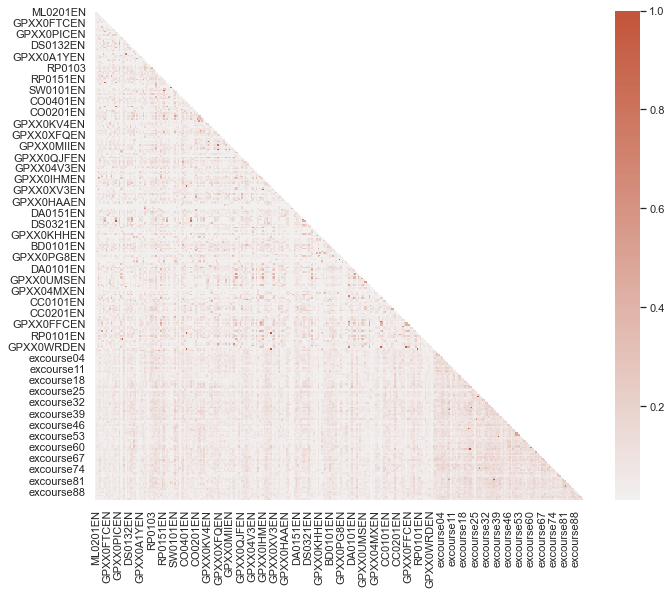

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
mask = np.triu(np.ones_like(similarity_df, dtype=bool))
_, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Plot a similarity heat map
sns.heatmap(similarity_df, mask=mask, cmap=cmap, vmin=0.01, vmax=1, center=0,
            square=True)

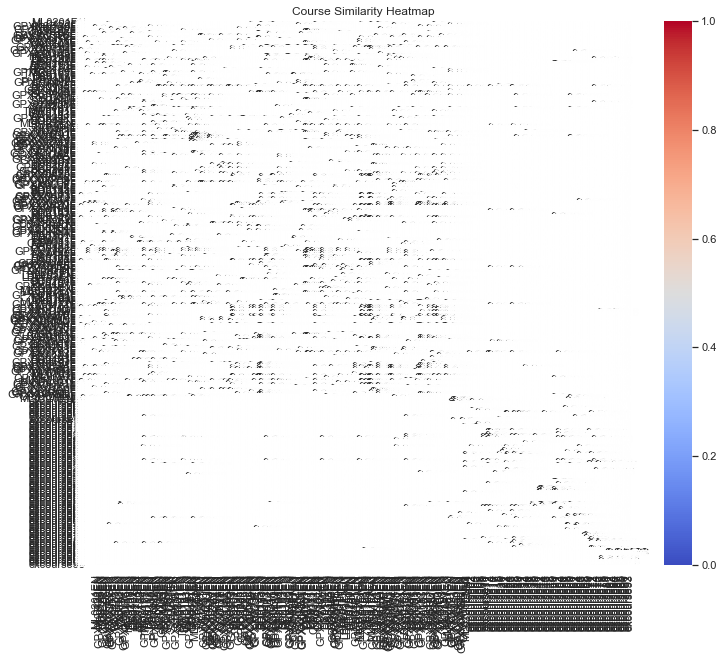

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the heatmap
sns.set(style="white")

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=True, fmt=".5f", cmap="coolwarm", xticklabels=unique_courses, yticklabels=unique_courses)
plt.title('Course Similarity Heatmap')
plt.show()

In [23]:
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [24]:
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["ML0151EN"]
idx2 = id_idx_dict["ML0101ENv3"]
print(f"Course 1's index is {idx1} and Course 2's index is {idx2}")

Course 1's index is 200 and Course 2's index is 158


In [25]:
sim_matrix = similarity_df.to_numpy()
sim = sim_matrix[idx1][idx2]
sim

0.256529

In [26]:
enrolled_course_ids = course_df['COURSE_ID'][0:10]
enrolled_courses = course_df[course_df['COURSE_ID'].isin(enrolled_course_ids)]
enrolled_courses

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
5,CNSC02EN,cloud native security conference data security,introduction to data security on cloud
6,DX0106EN,data science bootcamp with r for university pr...,a multi day intensive in person data science ...
7,GPXX0FTCEN,learn how to use docker containers for iterati...,learn how to use docker containers for iterati...
8,RAVSCTEST1,scorm test 1,scron test course
9,GPXX06RFEN,create your first mongodb database,in this guided project you will get started w...


In [27]:
all_courses = set(course_df['COURSE_ID'])
unselected_course_ids = all_courses.difference(enrolled_course_ids)

In [28]:
def generate_recommendations(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix):
    res = {}
    threshold = 0.6
    for enrolled_course in enrolled_course_ids:
        for unselect_course in unselected_course_ids:
            if enrolled_course in id_idx_dict and unselect_course in id_idx_dict:

                sim = 0
                idx1 = id_idx_dict[enrolled_course]
                idx2 = id_idx_dict[unselect_course]
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_course not in res:
                        res[unselect_course] = sim
                    else:
                        if sim >= res[unselect_course]:
                            res[unselect_course] = sim
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [30]:
sim_matrix = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/sim.csv').to_numpy()

In [31]:
generate_recommendations(enrolled_courses['COURSE_ID'], unselected_course_ids, id_idx_dict, sim_matrix)

{'TMP0106': 0.9476225544736294,
 'DX0107EN': 0.6822882392210131,
 'ML0122ENv3': 0.6815739441431503,
 'DX0108EN': 0.6685032174373867,
 'TMP107': 0.6499336836196815,
 'DS0110EN': 0.6064784348631227}

In [30]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_users_url)

def generate_recommendations_for_all():
    users = []
    courses = []
    sim_scores = []
    sim_df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/similarity_matrix.csv')
    sim_matrix = sim_df.to_numpy()
    # Course content dataframe
    course_df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/courses.csv')
    # Course BoW features
    bow_df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/bows_df.csv')
    test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
    test_user_ids = test_users['user'].to_list()

    for user_id in test_user_ids:
        idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)

        enrolled_course_ids = test_users_df[test_users_df['user'] == 1502801]['item'].to_numpy()
        all_courses = set(course_df['COURSE_ID'])
        unselected_course_ids = all_courses.difference(enrolled_course_ids)

        course_score_dict = generate_recommendations(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix)
        for k, v in course_score_dict.items():
            users.append(user_id)
            courses.append(k)
            sim_scores.append(v)
    return users, courses, sim_scores

result = {}
users, courses, sim_scores = generate_recommendations_for_all()
result['USER'] = users
result['COURSE_ID'] = courses
result['SCORE'] = sim_scores
res_df = pd.DataFrame(result, columns=['USER', 'COURSE_ID', 'SCORE'])
res_df.head()

,USER,COURSE_ID,SCORE
0,37465,excourse67,0.708214
1,37465,excourse72,0.652535
2,37465,excourse74,0.650071
3,37465,BD0145EN,0.623544
4,37465,excourse68,0.616759


# Collaborative Filtering using NMF

In [43]:
rating_url = "C:/Users/91798/E-Learning Recommendation System/ratings.csv"
rating_df = pd.read_csv(rating_url)
rating_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [44]:
rating_df.shape

(233442, 3)

In [46]:
from surprise import NMF
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dump import dump

In [47]:
rating_df.to_csv("course_ratings.csv", index=False)
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

coruse_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

In [48]:
trainset, testset = train_test_split(coruse_dataset, test_size=.3)

In [59]:
print(f"Total {trainset.n_users} users and {trainset.n_items} items in the training set")

Total 31344 users and 135 items in the training set


In [50]:
algo = NMF(verbose=True, random_state=123)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.20

0.20812483243210195

In [52]:
model_file_path = 'C:/Users/91798/E-Learning Recommendation System/NMF_model.pkl'
dump(model_file_path, algo=algo)

In [69]:
from surprise.dump import load
loaded_model = load('C:/Users/91798/E-Learning Recommendation System/NMF_model.pkl')[1]
predictions = loaded_model.test(testset)

for prediction in predictions[:5]:
    print(prediction)

user: 1242502    item: PY0101EN   r_ui = 3.00   est = 2.95   {'was_impossible': False}
user: 1392884    item: ML0115EN   r_ui = 3.00   est = 2.83   {'was_impossible': False}
user: 1230681    item: LB0109ENv1 r_ui = 3.00   est = 2.93   {'was_impossible': False}
user: 1133933    item: DS0301EN   r_ui = 3.00   est = 2.97   {'was_impossible': False}
user: 779151     item: ML0122EN   r_ui = 2.00   est = 2.95   {'was_impossible': True, 'reason': 'User and item are unknown.'}


# KNN based Collaborative Filtering

In [71]:
user_item_url = "C:/Users/91798/E-Learning Recommendation System/rating_sparse_df.csv"
ui_matrix = pd.read_csv(user_item_url)
ui_matrix.head()

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,WA0103EN,excourse40,excourse46,excourse47,excourse52,excourse53,excourse54,excourse69,excourse77,excourse84
0,2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
ui_matrix.shape

(33937, 140)

In [73]:
!pip install scikit-surprise

In [74]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [75]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [76]:
rating_df.to_csv("C:/Users/91798/E-Learning Recommendation System/course_ratings.csv", index=False)
# Read the course rating dataset with columns user item rating
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

course_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

In [77]:
trainset, testset = train_test_split(course_dataset, test_size=.3)
print(f"Total {trainset.n_users} users and {trainset.n_items} items in the training set")

Total 31423 users and 137 items in the training set


In [78]:
algo = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.1932


0.19324597353107806

In [81]:
sorted_predictions = sorted(predictions, key=lambda x: x[0])
sorted_predictions_no_details = [(uid, iid, r_ui, est) for uid, iid, r_ui, est, _ in sorted_predictions]
i = 0
for prediction in sorted_predictions_no_details:
    i+=1
    print(prediction)
    if i>10:
        break

('1000091', 'DB0101EN', 3.0, 3)
('1000091', 'BC0101EN', 3.0, 3)
('1000091', 'ML0103EN', 3.0, 3)
('1000091', 'ST0101EN', 3.0, 3)
('1000139', 'PY0101EN', 3.0, 3)
('1000139', 'BD0211EN', 3.0, 2.975)
('1000171', 'DS0101EN', 3.0, 3)
('1000171', 'DA0101EN', 3.0, 3)
('1000171', 'ML0115EN', 3.0, 3)
('1000171', 'ML0120ENv2', 3.0, 3)
('1000171', 'DS0103EN', 3.0, 3)
('1000172', 'BC0101EN', 3.0, 3)
('1000172', 'DS0103EN', 3.0, 3)
('1000172', 'ST0101EN', 3.0, 3)
('1000193', 'PY0101EN', 3.0, 3)
('1000193', 'DA0101EN', 3.0, 3)
('1000307', 'BD0101EN', 3.0, 3)
('1000307', 'BD0111EN', 3.0, 2.975)
('1000338', 'BC0101EN', 3.0, 3)
('1000439', 'RP0101EN', 3.0, 3)
('1000439', 'ML0151EN', 3.0, 3)
('1000470', 'ML0101ENv3', 3.0, 3)
('1000470', 'BC0201EN', 3.0, 2.975)
('1000552', 'BD0212EN', 3.0, 3)
('1000552', 'BD0115EN', 3.0, 3)
('1000552', 'BD0121EN', 3.0, 3)
('1000577', 'DB0101EN', 3.0, 3)
('1000577', 'PY0101EN', 3.0, 3)
('1000578', 'BC0101EN', 3.0, 3)
('1000578', 'CO0101EN', 3.0, 3)
('1000614', 'BD0101EN', 

('1055564', 'BC0201EN', 2.0, 2.9528238958686486)
('1055584', 'DV0101EN', 3.0, 3)
('1055584', 'CC0101EN', 3.0, 3)
('1055586', 'BC0201EN', 2.0, 2.9528238958686486)
('1055587', 'CO0301EN', 3.0, 3)
('1055587', 'ML0101ENv3', 3.0, 3)
('105564', 'PA0101EN', 3.0, 3)
('105564', 'DS0101EN', 3.0, 3)
('105564', 'DS0103EN', 3.0, 3)
('1055649', 'BD0131EN', 3.0, 3)
('1055649', 'BD0115EN', 3.0, 3)
('1055649', 'PY0101EN', 3.0, 3)
('1055649', 'CO0101EN', 3.0, 3)
('1055680', 'BD0101EN', 3.0, 3)
('1055680', 'BD0111EN', 3.0, 2.975)
('1055680', 'PY0101EN', 3.0, 3)
('1055680', 'CO0101EN', 3.0, 3)
('1055698', 'BC0201EN', 2.0, 2.9528238958686486)
('1055724', 'ST0101EN', 3.0, 3)
('1055747', 'CB0103EN', 3.0, 3)
('1055747', 'CO0201EN', 3.0, 3)
('1055817', 'BC0201EN', 2.0, 2.9528238958686486)
('1055854', 'CC0101EN', 3.0, 3)
('1055854', 'BD0101EN', 3.0, 3)
('1055854', 'CC0103EN', 3.0, 3)
('1055923', 'EE0101EN', 3.0, 3)
('1055923', 'DA0101EN', 3.0, 3)
('1055997', 'BC0201EN', 2.0, 2.9528238958686486)
('1056018', 'BC0

('1104581', 'LB0101ENv1', 3.0, 3)
('1104581', 'LB0105ENv1', 3.0, 3)
('1104581', 'LB0109ENv1', 3.0, 3)
('1104581', 'LB0111EN', 3.0, 3)
('1104703', 'DV0101EN', 3.0, 3)
('1104703', 'DS0105EN', 3.0, 3)
('1104703', 'BD0101EN', 3.0, 3)
('1104785', 'ML0115EN', 3.0, 3)
('1104785', 'PY0101EN', 3.0, 3)
('1104787', 'BC0201EN', 3.0, 2.975)
('1104787', 'DS0105EN', 3.0, 3)
('1104787', 'PY0101EN', 3.0, 3)
('1104809', 'BD0223EN', 3.0, 3)
('1104809', 'BD0101EN', 3.0, 3)
('1104809', 'BD0221EN', 3.0, 3)
('1104864', 'DW0101EN', 3.0, 3)
('1104864', 'CC0101EN', 3.0, 3)
('1104864', 'CO0101EN', 3.0, 3)
('1104884', 'BC0101EN', 3.0, 3)
('1104884', 'BD0101EN', 3.0, 3)
('1104943', 'PY0101EN', 3.0, 3)
('1104943', 'RP0103EN', 3.0, 3)
('1104943', 'ML0151EN', 3.0, 3)
('1104943', 'ML0115EN', 3.0, 3)
('1104943', 'CL0101EN', 3.0, 2.975)
('1104943', 'ML0101ENv3', 3.0, 3)
('1104959', 'CL0101EN', 2.0, 2.9528238958686486)
('1104979', 'CL0101EN', 3.0, 2.975)
('1104979', 'PY0101EN', 3.0, 3)
('1105023', 'CB0103EN', 3.0, 3)
('1

('1158078', 'BC0101EN', 3.0, 3)
('1158082', 'ST0101EN', 3.0, 3)
('1158115', 'CB0103EN', 3.0, 3)
('1158115', 'ST0101EN', 3.0, 3)
('1158115', 'ML0101ENv3', 3.0, 3)
('1158271', 'PY0101EN', 3.0, 3)
('1158272', 'BD0223EN', 3.0, 3)
('1158272', 'BD0115EN', 3.0, 3)
('1158272', 'PA0101EN', 3.0, 3)
('1158272', 'DS0105EN', 3.0, 3)
('1158272', 'DV0151EN', 3.0, 3)
('1158433', 'LB0111EN', 3.0, 3)
('1158541', 'CL0101EN', 3.0, 2.975)
('1158541', 'ML0201EN', 3.0, 3)
('1158541', 'TMP0105EN', 3.0, 2.825)
('1158541', 'BC0202EN', 3.0, 3)
('1158541', 'ML0109EN', 3.0, 3)
('1158541', 'ML0101ENv3', 3.0, 3)
('1158541', 'BD0137EN', 3.0, 3)
('1158694', 'BC0201EN', 3.0, 2.975)
('1158694', 'DS0101EN', 3.0, 3)
('1158694', 'BC0101EN', 3.0, 3)
('1158776', 'ST0101EN', 3.0, 3)
('1158809', 'DV0101EN', 3.0, 3)
('1158809', 'DS0101EN', 3.0, 3)
('1158809', 'CO0101EN', 3.0, 3)
('1158959', 'BC0201EN', 3.0, 2.975)
('1158959', 'BD0211EN', 3.0, 2.975)
('1158959', 'CO0101EN', 3.0, 3)
('1159201', 'PY0101EN', 3.0, 3)
('1159201', 'CC

('1227916', 'CO0101EN', 3.0, 3)
('1227916', 'DA0101EN', 3.0, 3)
('1227929', 'CC0103EN', 3.0, 3)
('1227929', 'BD0101EN', 3.0, 3)
('1227949', 'ML0120ENv2', 3.0, 3)
('1227949', 'ML0122ENv1', 3.0, 2.925)
('1227949', 'ML0101ENv3', 3.0, 3)
('1228159', 'BC0202EN', 3.0, 3)
('1228215', 'BD0115EN', 3.0, 3)
('1228215', 'BD0212EN', 3.0, 3)
('1228234', 'ML0101ENv3', 3.0, 3)
('1228234', 'BC0101EN', 3.0, 3)
('1228256', 'ML0115EN', 3.0, 3)
('1228256', 'DB0101EN', 3.0, 3)
('1228296', 'CO0101EN', 3.0, 3)
('1228296', 'CL0101EN', 3.0, 2.975)
('1228374', 'ML0101ENv3', 3.0, 3)
('1228374', 'BD0223EN', 3.0, 3)
('1228374', 'BD0212EN', 3.0, 3)
('1228560', 'BC0101EN', 3.0, 3)
('1228560', 'ML0115EN', 3.0, 3)
('1228560', 'DB0101EN', 3.0, 3)
('1228636', 'ST0101EN', 3.0, 3)
('1228636', 'DS0105EN', 3.0, 3)
('1228636', 'DS0103EN', 3.0, 3)
('1228636', 'BC0101EN', 3.0, 3)
('1228717', 'BD0221EN', 3.0, 3)
('1228717', 'PY0101EN', 3.0, 3)
('1228717', 'CC0101EN', 3.0, 3)
('1228717', 'CB0103EN', 3.0, 3)
('1228798', 'DA0101EN'

('1293159', 'DV0101EN', 3.0, 3)
('1293159', 'ML0201EN', 3.0, 3)
('1293228', 'ML0120ENv2', 3.0, 3)
('1293239', 'DS0101EN', 3.0, 3)
('1293239', 'BC0101EN', 3.0, 3)
('1293247', 'DS0110EN', 2.0, 2.9528238958686486)
('1293273', 'CO0301EN', 3.0, 3)
('1293296', 'DV0101EN', 3.0, 3)
('1293445', 'CO0101EN', 3.0, 3)
('1293445', 'BD0211EN', 3.0, 2.975)
('1293445', 'PY0101EN', 3.0, 3)
('1293564', 'RP0101EN', 3.0, 3)
('1293564', 'DS0103EN', 3.0, 3)
('1293564', 'DS0101EN', 3.0, 3)
('1293564', 'ML0103EN', 3.0, 3)
('1293606', 'BD0101EN', 3.0, 3)
('1293606', 'CB0103EN', 3.0, 3)
('1293606', 'BC0101EN', 3.0, 3)
('1293612', 'BD0123EN', 3.0, 3)
('1293612', 'BD0131EN', 3.0, 3)
('1293612', 'BD0143EN', 3.0, 3)
('1293612', 'BD0137EN', 3.0, 3)
('1293612', 'BD0223EN', 3.0, 3)
('1293612', 'PY0101EN', 3.0, 3)
('1293612', 'BD0221EN', 3.0, 3)
('1293612', 'DS0105EN', 3.0, 3)
('1293612', 'SC0101EN', 3.0, 3)
('1293646', 'LB0109ENv1', 3.0, 3)
('1293646', 'LB0103ENv1', 3.0, 3)
('1293646', 'CO0201EN', 3.0, 3)
('1293685', '

('1357285', 'PY0101EN', 3.0, 3)
('1357318', 'CB0105ENv1', 3.0, 3)
('1357318', 'ST0101EN', 3.0, 3)
('1357318', 'BD0111EN', 3.0, 2.975)
('1357318', 'RP0101EN', 3.0, 3)
('1357318', 'CB0103EN', 3.0, 3)
('1357318', 'BD0211EN', 3.0, 2.975)
('1357318', 'CO0101EN', 3.0, 3)
('1357328', 'CO0201EN', 3.0, 3)
('1357328', 'BD0115EN', 3.0, 3)
('1357328', 'BD0101EN', 3.0, 3)
('1357352', 'BD0101EN', 3.0, 3)
('1357352', 'BD0111EN', 3.0, 2.975)
('1357352', 'DS0110EN', 3.0, 2.975)
('1357387', 'DV0101EN', 3.0, 3)
('1357396', 'DS0103EN', 3.0, 3)
('1357396', 'CC0271EN', 3.0, 3)
('1357433', 'ML0101ENv3', 3.0, 3)
('1357433', 'PY0101EN', 3.0, 3)
('1357433', 'DS0103EN', 3.0, 3)
('1357433', 'RP0101EN', 3.0, 3)
('1357433', 'DS0101EN', 3.0, 3)
('1357561', 'CB0103EN', 3.0, 3)
('1357561', 'DS0101EN', 3.0, 3)
('1357561', 'BD0111EN', 3.0, 3)
('1357575', 'ML0101ENv3', 3.0, 3)
('1357575', 'PY0101EN', 3.0, 3)
('1357575', 'ML0122ENv1', 3.0, 2.95)
('1357626', 'BD0111EN', 3.0, 3)
('1357626', 'BC0101EN', 3.0, 3)
('1357626', '

('1441892', 'DS0105EN', 3.0, 3)
('1441968', 'PY0101EN', 3.0, 3)
('1441968', 'DB0101EN', 3.0, 3)
('1442068', 'BD0101EN', 3.0, 3)
('1442068', 'ST0101EN', 3.0, 3)
('1442068', 'DV0101EN', 3.0, 3)
('1442163', 'DAI101EN', 2.0, 2.9528238958686486)
('1442173', 'ML0101ENv3', 3.0, 3)
('1442173', 'ST0101EN', 3.0, 3)
('1442248', 'LB0103ENv1', 3.0, 3)
('1442248', 'BD0131EN', 3.0, 3)
('1442248', 'ML0103EN', 3.0, 3)
('1442248', 'CB0103EN', 3.0, 3)
('1442248', 'PY0101EN', 3.0, 3)
('1442248', 'PA0101EN', 3.0, 3)
('1442248', 'DS0105EN', 3.0, 3)
('1442248', 'BD0111EN', 3.0, 2.975)
('1442248', 'ML0101ENv3', 3.0, 3)
('1442262', 'BD0141EN', 3.0, 3)
('1442262', 'BD0101EN', 3.0, 3)
('1442307', 'RP0101EN', 3.0, 3)
('1442311', 'CO0101EN', 3.0, 3)
('1442311', 'DS0101EN', 3.0, 3)
('1442311', 'PY0101EN', 3.0, 3)
('1442318', 'BD0101EN', 3.0, 3)
('1442369', 'BD0101EN', 3.0, 3)
('1442423', 'DS0101EN', 3.0, 3)
('1442423', 'DV0151EN', 3.0, 3)
('1442467', 'DA0101EN', 3.0, 3)
('1442467', 'PY0101EN', 3.0, 3)
('1442493', '

('1519165', 'CC0101EN', 3.0, 3)
('1519165', 'CC0150EN', 3.0, 3)
('1519165', 'ML0115EN', 3.0, 3)
('1519165', 'DS0103EN', 3.0, 3)
('1519214', 'PY0101EN', 3.0, 3)
('1519364', 'DA0101EN', 3.0, 3)
('1519364', 'ML0101ENv3', 3.0, 3)
('1519364', 'CB0103EN', 3.0, 3)
('1519396', 'DB0151EN', 3.0, 3)
('1519396', 'BD0211EN', 3.0, 2.975)
('1519396', 'BD0101EN', 3.0, 3)
('1519396', 'BC0202EN', 3.0, 3)
('1519396', 'BC0101EN', 3.0, 3)
('1519396', 'BD0111EN', 3.0, 3)
('1519396', 'DS0103EN', 3.0, 3)
('1519457', 'BD0101EN', 3.0, 3)
('1519457', 'BD0212EN', 3.0, 3)
('1519457', 'SC0101EN', 3.0, 3)
('1519457', 'BD0211EN', 3.0, 2.975)
('1519460', 'DA0101EN', 3.0, 3)
('1519460', 'DS0101EN', 3.0, 3)
('1519523', 'BD0101EN', 3.0, 3)
('1519595', 'CC0201EN', 3.0, 3)
('1519631', 'DS0103EN', 3.0, 3)
('1519631', 'ML0101ENv3', 3.0, 3)
('1519638', 'RP0101EN', 3.0, 3)
('1519744', 'DS0105EN', 3.0, 3)
('1519744', 'PY0101EN', 3.0, 3)
('1519834', 'DB0101EN', 3.0, 3)
('1519834', 'DS0103EN', 3.0, 3)
('1519844', 'CO0201EN', 3.0,

('1606870', 'BD0211EN', 3.0, 2.975)
('1606870', 'BD0115EN', 3.0, 3)
('1606870', 'BD0101EN', 3.0, 3)
('1606884', 'PY0101EN', 3.0, 3)
('1606884', 'BD0211EN', 3.0, 2.975)
('1606884', 'ML0101ENv3', 3.0, 3)
('1606895', 'BC0201EN', 3.0, 2.975)
('1606895', 'AI0111EN', 3.0, 3)
('1606895', 'BC0202EN', 3.0, 3)
('1606902', 'BD0101EN', 3.0, 3)
('1606902', 'BC0202EN', 3.0, 3)
('1606902', 'HCC105EN', 3.0, 3)
('1606902', 'BD0211EN', 3.0, 2.975)
('1606902', 'BC0201EN', 3.0, 2.975)
('1606902', 'CB0103EN', 3.0, 3)
('1606902', 'CC0103EN', 3.0, 3)
('1606902', 'DV0101EN', 3.0, 3)
('1606902', 'ML0151EN', 3.0, 3)
('1606903', 'EE0101EN', 3.0, 3)
('1606903', 'BD0121EN', 3.0, 3)
('1606903', 'ML0103EN', 3.0, 3)
('1606925', 'DA0101EN', 3.0, 3)
('1606925', 'DS0301EN', 3.0, 3)
('1606925', 'PY0101EN', 3.0, 3)
('1606944', 'ML0120ENv2', 3.0, 3)
('1606944', 'BC0101EN', 3.0, 3)
('1606944', 'ML0115EN', 3.0, 3)
('1606944', 'DA0101EN', 3.0, 3)
('1606944', 'ML0151EN', 3.0, 3)
('1606944', 'RP0105EN', 3.0, 3)
('1606944', 'DS0

('1687206', 'DV0101EN', 3.0, 3)
('1687206', 'DB0101EN', 3.0, 3)
('1687277', 'CC0250EN', 3.0, 3)
('1687283', 'CNSC02EN', 2.0, 2.9528238958686486)
('1687291', 'CNSC02EN', 2.0, 2.9528238958686486)
('1687344', 'ML0101ENv3', 3.0, 3)
('1687344', 'DS0101EN', 3.0, 3)
('1687344', 'CC0101EN', 3.0, 3)
('1687388', 'CNSC02EN', 2.0, 2.9528238958686486)
('1687493', 'ML0115EN', 3.0, 3)
('1687500', 'CNSC02EN', 2.0, 2.9528238958686486)
('1687681', 'BD0211EN', 3.0, 2.975)
('1687681', 'DS0101EN', 3.0, 3)
('1687681', 'DA0101EN', 3.0, 3)
('1687699', 'CNSC02EN', 2.0, 2.9528238958686486)
('1687753', 'DA0101EN', 3.0, 3)
('1687753', 'ML0101ENv3', 3.0, 3)
('1687753', 'DV0101EN', 3.0, 3)
('1687773', 'CNSC02EN', 2.0, 2.9528238958686486)
('1687855', 'CC0201EN', 3.0, 3)
('1687855', 'ML0122ENv1', 3.0, 2.9)
('1687855', 'ML0120ENv2', 3.0, 3)
('1687855', 'PY0101EN', 3.0, 3)
('1687855', 'BD0123EN', 3.0, 3)
('1687855', 'ML0101ENv3', 3.0, 3)
('1687875', 'DV0101EN', 3.0, 3)
('1687875', 'PY0101EN', 3.0, 3)
('1687875', 'ML010

('1781964', 'DS0103EN', 3.0, 3)
('1781989', 'DAI101EN', 2.0, 2.9528238958686486)
('1782269', 'DS0301EN', 3.0, 3)
('1782269', 'PY0101EN', 3.0, 3)
('1782269', 'DS0101EN', 3.0, 3)
('1782362', 'ST0101EN', 3.0, 3)
('1782362', 'DE0205EN', 3.0, 3)
('1782362', 'ML0151EN', 3.0, 3)
('1782362', 'DS0103EN', 3.0, 3)
('1782362', 'CC0250EN', 3.0, 3)
('1782415', 'DV0101EN', 3.0, 3)
('1782583', 'DA0101EN', 3.0, 3)
('1782583', 'DB0101EN', 3.0, 3)
('1782631', 'DS0105EN', 3.0, 3)
('1782631', 'ML0115EN', 3.0, 3)
('1782790', 'CC0101EN', 3.0, 3)
('1782790', 'DA0101EN', 3.0, 3)
('1782790', 'IT0101EN', 3.0, 3)
('1782790', 'BD0101EN', 3.0, 3)
('1782827', 'DV0101EN', 3.0, 3)
('1782827', 'DA0101EN', 3.0, 3)
('1782842', 'DA0101EN', 3.0, 3)
('1782842', 'DS0105EN', 3.0, 3)
('1782842', 'DV0101EN', 3.0, 3)
('1782873', 'DS0101EN', 3.0, 3)
('1782873', 'ML0115EN', 3.0, 3)
('1782873', 'ML0101ENv3', 3.0, 3)
('1783014', 'CC0103EN', 3.0, 3)
('1783014', 'CC0101EN', 3.0, 3)
('1783014', 'DS0103EN', 3.0, 3)
('1783014', 'DV0101EN

('1889567', 'BD0212EN', 3.0, 3)
('1889740', 'CC0101EN', 3.0, 3)
('1889740', 'CO0401EN', 3.0, 3)
('1889804', 'PY0101EN', 3.0, 3)
('1889878', 'ML0101ENv3', 3.0, 3)
('1889878', 'CC0101EN', 3.0, 3)
('1889878', 'CC0103EN', 3.0, 3)
('1889878', 'DS0101EN', 3.0, 3)
('1889878', 'HCC104EN', 3.0, 3)
('1889878', 'ML0120ENv2', 3.0, 3)
('1889878', 'PY0101EN', 3.0, 3)
('1890032', 'DB0101EN', 3.0, 3)
('1890032', 'DS0103EN', 3.0, 3)
('1890032', 'DA0101EN', 3.0, 3)
('1890051', 'TA0105EN', 3.0, 3)
('1890051', 'BD0211EN', 3.0, 2.975)
('1890220', 'RP0105EN', 3.0, 3)
('1890220', 'ML0103EN', 3.0, 3)
('1890220', 'DS0103EN', 3.0, 3)
('1890220', 'CC0103EN', 3.0, 3)
('1890220', 'ML0120ENv2', 3.0, 3)
('1890220', 'DA0101EN', 3.0, 3)
('1890220', 'BC0201EN', 3.0, 2.975)
('1890372', 'DS0101EN', 3.0, 3)
('1890372', 'DA0101EN', 3.0, 3)
('1890413', 'DS0101EN', 3.0, 3)
('1890413', 'CO0301EN', 3.0, 3)
('1890496', 'DS0132EN', 2.0, 2.9528238958686486)
('1890592', 'DS0101EN', 3.0, 3)
('1890592', 'DS0103EN', 3.0, 3)
('1890639

('2069055', 'ML0101ENv3', 3.0, 3)
('2069063', 'CC0101EN', 3.0, 3)
('2069063', 'ML0101ENv3', 3.0, 3)
('2069354', 'DS0301EN', 3.0, 3)
('2069354', 'DS0105EN', 3.0, 3)
('2069689', 'CNSC02EN', 2.0, 2.9528238958686486)
('2069981', 'CC0150EN', 3.0, 3)
('2070163', 'DS0105EN', 3.0, 3)
('2070163', 'DA0101EN', 3.0, 3)
('2070163', 'DS0101EN', 3.0, 3)
('2070341', 'CC0101EN', 3.0, 3)
('2070418', 'PY0101EN', 3.0, 3)
('207048', 'DB0101EN', 3.0, 3)
('207048', 'DS0101EN', 3.0, 3)
('207048', 'WA0101EN', 3.0, 3)
('2070556', 'PY0101EN', 3.0, 3)
('2070599', 'PY0101EN', 3.0, 3)
('2070599', 'ML0115EN', 3.0, 3)
('2070750', 'BD0101EN', 3.0, 3)
('2071004', 'CO0401EN', 3.0, 3)
('2071004', 'CO0101EN', 3.0, 3)
('2071084', 'CNSC02EN', 2.0, 2.9528238958686486)
('2071263', 'CC0101EN', 3.0, 3)
('2071263', 'CO0301EN', 3.0, 3)
('2071314', 'BD0211EN', 3.0, 2.975)
('2071324', 'PY0101EN', 3.0, 3)
('2071583', 'PY0101EN', 3.0, 3)
('2071583', 'DV0101EN', 3.0, 3)
('2071940', 'DS0105EN', 3.0, 3)
('2072182', 'CNSC02EN', 2.0, 2.95

('403088', 'BD0111EN', 3.0, 3)
('403088', 'BD0121EN', 3.0, 3)
('403088', 'BD0211EN', 3.0, 2.975)
('403135', 'BD0101EN', 3.0, 3)
('403135', 'CO0101EN', 3.0, 3)
('403135', 'DS0201EN', 3.0, 3)
('403135', 'LB0105ENv1', 3.0, 3)
('403135', 'EE0101EN', 3.0, 3)
('403135', 'ST0101EN', 3.0, 3)
('403135', 'BD0211EN', 3.0, 2.975)
('403135', 'DS0101EN', 3.0, 3)
('403135', 'DS0301EN', 3.0, 3)
('403135', 'CL0101EN', 3.0, 2.975)
('403135', 'LB0101ENv1', 3.0, 3)
('403340', 'ML0122ENv1', 2.0, 2.9528238958686486)
('403404', 'PY0101EN', 3.0, 3)
('403404', 'DW0101EN', 3.0, 3)
('403404', 'BD0221EN', 3.0, 3)
('403517', 'DB0151EN', 3.0, 3)
('403517', 'BD0101EN', 3.0, 3)
('403517', 'DS0101EN', 3.0, 3)
('403519', 'BD0111EN', 3.0, 2.975)
('403528', 'BD0101EN', 3.0, 3)
('403565', 'DB0151EN', 3.0, 3)
('403565', 'DS0101EN', 3.0, 3)
('403565', 'BD0131EN', 3.0, 3)
('403587', 'BC0202EN', 3.0, 3)
('403587', 'DS0301EN', 3.0, 3)
('403587', 'DS0101EN', 3.0, 3)
('403587', 'BD0123EN', 3.0, 3)
('403587', 'ML0103EN', 3.0, 3)


('50831', 'RP0101EN', 3.0, 3)
('50831', 'DS0103EN', 3.0, 3)
('508344', 'BD0115EN', 3.0, 3)
('508344', 'BD0101EN', 3.0, 3)
('508368', 'BD0111EN', 3.0, 3)
('508368', 'ML0101EN', 3.0, 3)
('508368', 'BC0101EN', 3.0, 3)
('508368', 'RP0101EN', 3.0, 2.975)
('508372', 'DS0101EN', 2.0, 2.9528238958686486)
('508567', 'BD0111EN', 3.0, 3)
('508629', 'BD0115EN', 3.0, 3)
('508641', 'ML0101ENv3', 3.0, 3)
('508641', 'BD0101EN', 3.0, 3)
('508641', 'DS0101EN', 3.0, 3)
('508672', 'PY0101EN', 3.0, 3)
('508696', 'ML0115EN', 3.0, 3)
('508893', 'DS0101EN', 2.0, 2.9528238958686486)
('508906', 'DS0101EN', 2.0, 2.9528238958686486)
('508927', 'DS0101EN', 2.0, 2.9528238958686486)
('509020', 'DS0103EN', 2.0, 2.9528238958686486)
('509020', 'DS0101EN', 2.0, 2.9528238958686486)
('509031', 'TMP0106', 3.0, 2)
('509086', 'RP0101EN', 2.0, 2.9528238958686486)
('509145', 'TMP0105EN', 2.0, 2.9528238958686486)
('509193', 'DS0103EN', 3.0, 3)
('509193', 'BD0111EN', 3.0, 2.975)
('509255', 'DS0101EN', 2.0, 2.9528238958686486)
('

('578598', 'BC0101EN', 3.0, 3)
('578598', 'DV0101EN', 3.0, 3)
('578598', 'BD0111EN', 3.0, 2.975)
('578598', 'PA0101EN', 3.0, 3)
('578598', 'BD0115EN', 3.0, 3)
('578651', 'CO0201EN', 3.0, 3)
('578677', 'BD0101EN', 3.0, 3)
('578677', 'CO0101EN', 3.0, 3)
('578766', 'DS0101EN', 3.0, 3)
('578766', 'CO0101EN', 3.0, 3)
('578766', 'CO0201EN', 3.0, 3)
('578874', 'BD0143EN', 3.0, 3)
('578874', 'BD0101EN', 3.0, 3)
('578874', 'RP0151EN', 3.0, 3)
('578906', 'DS0105EN', 3.0, 3)
('578906', 'DS0101EN', 3.0, 3)
('578906', 'PA0101EN', 3.0, 3)
('578973', 'BD0111EN', 3.0, 2.975)
('579062', 'BD0111EN', 3.0, 2.975)
('579062', 'PY0101EN', 3.0, 3)
('579252', 'BD0101EN', 3.0, 3)
('579324', 'BD0143EN', 3.0, 3)
('579324', 'BD0101EN', 3.0, 3)
('579324', 'BD0131EN', 3.0, 3)
('579324', 'BD0111EN', 3.0, 2.975)
('579611', 'PA0101EN', 3.0, 3)
('579613', 'DB0101EN', 3.0, 3)
('579613', 'ML0109EN', 3.0, 3)
('579613', 'BD0115EN', 3.0, 3)
('579613', 'BD0131EN', 3.0, 3)
('579613', 'DS0301EN', 3.0, 3)
('579613', 'BD0111EN', 

('653766', 'BD0131EN', 3.0, 3)
('653766', 'ML0120EN', 3.0, 3)
('653766', 'BD0141EN', 3.0, 3)
('653766', 'BD0115EN', 3.0, 3)
('653766', 'BD0101EN', 3.0, 3)
('653845', 'DS0103EN', 3.0, 3)
('653845', 'WA0101EN', 3.0, 3)
('653845', 'ML0101EN', 3.0, 3)
('653845', 'DS0105EN', 3.0, 3)
('655195', 'DS0101EN', 3.0, 3)
('655195', 'CO0301EN', 3.0, 3)
('655195', 'ML0201EN', 3.0, 3)
('655195', 'CO0401EN', 3.0, 3)
('655195', 'PY0101EN', 3.0, 3)
('657083', 'WA0101EN', 3.0, 3)
('657370', 'DS0101EN', 3.0, 3)
('657370', 'CC0101EN', 3.0, 3)
('657370', 'CC0103EN', 3.0, 3)
('65761', 'BC0201EN', 3.0, 2.975)
('65761', 'BC0101EN', 3.0, 3)
('657864', 'ST0101EN', 3.0, 3)
('657864', 'BD0101EN', 3.0, 3)
('657897', 'BD0111EN', 3.0, 2.975)
('657897', 'CB0103EN', 3.0, 3)
('657897', 'CO0401EN', 3.0, 3)
('657897', 'CO0301EN', 3.0, 3)
('657897', 'DS0105EN', 3.0, 3)
('659750', 'WA0101EN', 3.0, 3)
('659750', 'RP0101EN', 3.0, 3)
('659750', 'DS0101EN', 3.0, 3)
('659763', 'BD0133EN', 2.0, 2.9528238958686486)
('659793', 'DP01

('709775', 'BD0131EN', 3.0, 3)
('709809', 'ST0101EN', 3.0, 3)
('709809', 'DS0101EN', 3.0, 3)
('709809', 'CB0103EN', 3.0, 3)
('709841', 'CB0103EN', 2.0, 2.9528238958686486)
('709844', 'WA0101EN', 3.0, 3)
('709844', 'PY0101EN', 3.0, 3)
('709852', 'BD0101EN', 3.0, 3)
('709852', 'WA0101EN', 3.0, 3)
('709863', 'DS0101EN', 3.0, 3)
('709877', 'ML0122ENv1', 3.0, 2.925)
('709877', 'ML0201EN', 3.0, 3)
('709877', 'ML0115EN', 3.0, 3)
('709877', 'DA0101EN', 3.0, 3)
('709877', 'DS0301EN', 3.0, 3)
('709877', 'CO0101EN', 3.0, 3)
('709877', 'BD0101EN', 3.0, 3)
('709877', 'DS0101EN', 3.0, 3)
('709927', 'CC0103EN', 3.0, 3)
('709934', 'BD0101EN', 3.0, 3)
('709934', 'RP0101EN', 3.0, 3)
('709997', 'DS0105EN', 3.0, 3)
('709997', 'BD0101EN', 3.0, 3)
('709997', 'DS0103EN', 3.0, 3)
('709997', 'BD0211EN', 3.0, 2.975)
('710085', 'BC0101EN', 3.0, 3)
('710134', 'CB0103EN', 2.0, 2.9528238958686486)
('710210', 'CB0103EN', 3.0, 3)
('710214', 'DS0321EN', 3.0, 2.975)
('710214', 'BD0211EN', 3.0, 2.975)
('710214', 'SC0101

('753503', 'BD0111EN', 3.0, 2.975)
('753503', 'PY0101EN', 3.0, 3)
('753546', 'WA0101EN', 3.0, 3)
('753546', 'ML0101EN', 3.0, 3)
('753546', 'DV0101EN', 3.0, 3)
('753546', 'PY0101EN', 3.0, 3)
('753648', 'BD0101EN', 3.0, 3)
('753648', 'DS0101EN', 3.0, 3)
('753648', 'RP0101EN', 3.0, 3)
('753648', 'BD0111EN', 3.0, 3)
('753648', 'CB0103EN', 3.0, 3)
('75368', 'SC0103EN', 3.0, 3)
('75368', 'RP0101EN', 3.0, 3)
('75368', 'BC0101EN', 3.0, 3)
('75368', 'DV0101EN', 3.0, 3)
('75368', 'CB0105ENv1', 3.0, 3)
('75368', 'ML0101ENv3', 3.0, 3)
('75368', 'ML0115EN', 3.0, 3)
('75368', 'BC0201EN', 3.0, 2.975)
('75368', 'CO0101EN', 3.0, 3)
('75368', 'ML0122ENv1', 3.0, 2.9)
('75368', 'LB0101ENv1', 3.0, 3)
('753847', 'ML0101EN', 3.0, 3)
('753847', 'SW0201EN', 3.0, 3)
('753847', 'RP0101EN', 3.0, 3)
('753853', 'CC0101EN', 3.0, 3)
('753853', 'BC0101EN', 3.0, 3)
('753853', 'WA0101EN', 3.0, 3)
('753875', 'BD0101EN', 3.0, 3)
('753875', 'DV0101EN', 3.0, 3)
('753916', 'BD0111EN', 3.0, 3)
('753976', 'CC0103EN', 3.0, 3)
(

('8', 'BD0212EN', 2.0, 2.7555555555555555)
('80010', 'SC0103EN', 3.0, 3)
('80010', 'CB0103EN', 2.0, 3)
('80010', 'BD0211EN', 3.0, 2.975)
('80010', 'BD0123EN', 3.0, 3)
('80186', 'BD0115EN', 3.0, 3)
('80186', 'BD0131EN', 3.0, 3)
('80186', 'BD0141EN', 3.0, 3)
('8030', 'DB0151EN', 3.0, 3)
('8030', 'ML0101EN', 3.0, 3)
('8030', 'BD0211EN', 3.0, 2.975)
('8030', 'BC0101EN', 3.0, 3)
('8030', 'RP0101EN', 3.0, 3)
('8030', 'PY0101EN', 3.0, 3)
('8030', 'CC0201EN', 3.0, 3)
('8030', 'SC0105EN', 3.0, 3)
('80360', 'BD0101EN', 3.0, 3)
('80360', 'ML0151EN', 3.0, 3)
('80360', 'BD0115EN', 3.0, 3)
('805119', 'BD0137EN', 3.0, 3)
('805119', 'BD0101EN', 3.0, 3)
('8059', 'ML0120EN', 3.0, 3)
('8059', 'DA0101EN', 3.0, 3)
('80596', 'ST0101EN', 3.0, 3)
('80596', 'DS0103EN', 3.0, 3)
('80596', 'CC0101EN', 3.0, 3)
('8075', 'DV0101EN', 3.0, 3)
('8075', 'BD0121EN', 3.0, 3)
('8075', 'PY0101EN', 3.0, 3)
('8075', 'BD0211EN', 3.0, 2.975)
('8075', 'RP0103EN', 3.0, 3)
('8075', 'DB0101EN', 3.0, 3)
('809515', 'CO0101EN', 3.0, 3

('919457', 'DS0301EN', 3.0, 3)
('919457', 'DS0105EN', 3.0, 3)
('919459', 'DS0105EN', 3.0, 3)
('919459', 'BD0111EN', 3.0, 2.975)
('919459', 'BD0101EN', 3.0, 3)
('919459', 'BC0101EN', 3.0, 3)
('919469', 'ML0115EN', 3.0, 3)
('919469', 'PY0101EN', 3.0, 3)
('919469', 'DS0105EN', 3.0, 3)
('919500', 'BD0212EN', 3.0, 3)
('919500', 'BD0121EN', 3.0, 3)
('919500', 'BD0101EN', 3.0, 3)
('919558', 'RP0101EN', 3.0, 3)
('919629', 'DS0101EN', 3.0, 3)
('919629', 'CC0201EN', 3.0, 3)
('919629', 'BD0111EN', 3.0, 2.975)
('919639', 'RP0101EN', 3.0, 3)
('919639', 'CC0101EN', 3.0, 3)
('919639', 'DS0103EN', 3.0, 3)
('919639', 'DS0101EN', 3.0, 3)
('919703', 'CP0101EN', 3.0, 3)
('919703', 'ML0151EN', 3.0, 3)
('919703', 'RP0101EN', 3.0, 3)
('919703', 'BD0101EN', 3.0, 3)
('919703', 'ML0115EN', 3.0, 3)
('919775', 'PY0101EN', 3.0, 3)
('919775', 'DV0101EN', 3.0, 3)
('919793', 'DB0101EN', 3.0, 3)
('919793', 'DV0101EN', 3.0, 3)
('919814', 'ML0122ENv1', 2.0, 2.9528238958686486)
('919868', 'ML0101ENv3', 3.0, 3)
('919868',

('970728', 'SC0101EN', 3.0, 3)
('970728', 'ST0101EN', 3.0, 3)
('970728', 'CB0103EN', 3.0, 3)
('970728', 'ML0151EN', 3.0, 3)
('970728', 'RP0101EN', 3.0, 3)
('970741', 'RP0101EN', 3.0, 3)
('970741', 'BD0101EN', 3.0, 3)
('970779', 'BD0101EN', 3.0, 3)
('970796', 'SC0101EN', 3.0, 3)
('970895', 'ML0101ENv3', 3.0, 3)
('970895', 'ML0115EN', 3.0, 3)
('970895', 'BD0211EN', 3.0, 2.975)
('970895', 'BD0141EN', 3.0, 3)
('970895', 'BD0101EN', 3.0, 3)
('970895', 'BD0131EN', 3.0, 3)
('970895', 'BD0223EN', 3.0, 3)
('970899', 'LB0107ENv1', 3.0, 3)
('970899', 'ML0101ENv3', 3.0, 3)
('970899', 'BC0101EN', 3.0, 3)
('970899', 'CO0101EN', 3.0, 3)
('971021', 'BD0101EN', 3.0, 3)
('971021', 'BD0211EN', 3.0, 2.975)
('971021', 'BD0111EN', 3.0, 2.975)
('971133', 'BC0101EN', 3.0, 3)
('971431', 'SC0101EN', 3.0, 3)
('971431', 'BD0223EN', 3.0, 3)
('971431', 'BD0211EN', 3.0, 2.975)
('971487', 'ST0101EN', 3.0, 3)
('971487', 'DV0101EN', 3.0, 3)
('971487', 'ML0120ENv2', 3.0, 3)
('971487', 'BD0143EN', 3.0, 3)
('971487', 'CC0

# User-User Collaborative Filtering Technique

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ratings = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/course_ratings.csv')
ratings.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [3]:
ratings.tail()

,user,item,rating
233437,2103074,GPXX0ZG0EN,3.0
233438,2103074,DX0106EN,3.0
233439,2103075,ML0201EN,3.0
233440,2103075,GPXX0ZG0EN,3.0
233441,2103075,DX0106EN,3.0


In [4]:
ratings.shape

(233442, 3)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233442 entries, 0 to 233441
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    233442 non-null  int64  
 1   item    233442 non-null  object 
 2   rating  233442 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.3+ MB


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(ratings, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(163409, 3)
(70033, 3)


In [7]:
user_data = X_train.pivot(index = 'user', columns = 'item', values = 'rating').fillna(0)
user_data.head()

item,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,WA0101EN,WA0103EN,excourse40,excourse46,excourse47,excourse53,excourse54,excourse69,excourse77,excourse84
user,,,,,,,,,,,,,,,,,,,,,
2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
dummy_train = dummy_train.pivot(index = 'user', columns = 'item', values = 'rating').fillna(1)
dummy_test = dummy_test.pivot(index ='user', columns = 'item', values = 'rating').fillna(0)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.38425026 0.46546512 ... 0.         0.         0.        ]
 [0.38425026 1.         0.29611005 ... 0.         0.         0.        ]
 [0.46546512 0.29611005 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.81649658 0.70710678]
 [0.         0.         0.         ... 0.81649658 1.         0.57735027]
 [0.         0.         0.         ... 0.70710678 0.57735027 1.        ]]
(31336, 31336)


In [11]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[1.11898269e+02, 2.66780278e+03, 5.99945553e+02, ...,
        5.75576531e-01, 0.00000000e+00, 2.49231949e-01],
       [1.15033772e+02, 1.98175956e+03, 5.15682988e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.92518045e+01, 1.37374392e+03, 7.67110482e+02, ...,
        5.10753918e-01, 0.00000000e+00, 2.21162934e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90787236e+01, 6.87869531e+01, 3.63728134e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [12]:
user_predicted_ratings.shape

(31336, 135)

In [13]:
user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

item,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,WA0101EN,WA0103EN,excourse40,excourse46,excourse47,excourse53,excourse54,excourse69,excourse77,excourse84
user,,,,,,,,,,,,,,,,,,,,,
2,111.898269,0.000000,599.945553,257.518760,0.000000,0.000000,1705.134551,0.000000,665.741977,0.000000,...,803.064682,20.626310,0.287788,0.287788,0.249232,0.249232,0.000000,0.575577,0.0,0.249232
4,115.033772,1981.759560,515.682988,215.084620,4458.284783,3770.275928,0.000000,0.000000,0.000000,1161.440313,...,822.272062,26.608411,0.000000,0.000000,0.000000,0.000000,0.387298,0.000000,0.0,0.000000
5,89.251805,1373.743919,0.000000,193.219872,0.000000,2126.982549,780.498529,366.419882,0.000000,611.875134,...,511.707840,0.000000,0.255377,0.255377,0.221163,0.221163,0.000000,0.510754,0.0,0.221163
8,10.753685,177.560612,65.680791,39.989267,669.591221,746.913216,461.303571,246.843285,254.071041,407.227571,...,98.460797,11.534880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,113.644792,1618.167601,430.898818,193.043210,4658.723261,0.000000,0.000000,0.000000,635.178124,1550.114374,...,677.836692,21.067174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [15]:
user_final_ratings.iloc[8].sort_values(ascending = False)[0:5]

item
BD0111EN    3686.802691
DS0101EN    3082.536883
PY0101EN    2895.791168
BD0211EN    2397.000465
DS0103EN    1592.295505
Name: 19, dtype: float64

In [16]:
test_user_features = X_test.pivot(index = 'user', columns = 'item', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.11587244 0.04809861 ... 0.1300665  0.         0.        ]
 [0.11587244 1.         0.         ... 0.         0.         0.        ]
 [0.04809861 0.         1.         ... 0.13867505 0.         0.        ]
 ...
 [0.1300665  0.         0.13867505 ... 1.         0.5        0.35355339]
 [0.         0.         0.         ... 0.5        1.         0.70710678]
 [0.         0.         0.         ... 0.35355339 0.70710678 1.        ]]
- - - - - - - - - - 
(25785, 25785)


In [17]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[  36.70262606,  519.18350828,  163.82238767, ...,    0.        ,
           0.        ,    0.        ],
       [  15.4391383 ,  358.61675169,   88.73636857, ...,    0.        ,
           0.        ,    0.        ],
       [  63.73398264, 1163.04455548,  120.22175013, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  24.62668066, 1885.74918319,  176.8855308 , ...,    0.        ,
           0.        ,    0.        ],
       [   3.9486833 ,   41.78163635,   18.21120987, ...,    0.        ,
           0.        ,    0.        ],
       [   2.79214074,   29.54407839,   12.87726999, ...,    0.        ,
           0.        ,    0.        ]])

In [18]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

item,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,TA0106EN,TMP0105EN,TMP0106,WA0101EN,WA0103EN,excourse40,excourse46,excourse47,excourse52,excourse77
user,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,226.541771,0.000000,...,0.0,0.0,0.0,479.416507,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,2559.959062,2094.184221,0.0,0.0,0.000000,616.745589,...,0.0,0.0,0.0,471.915299,10.909865,0.0,0.0,0.0,0.0,0.0
5,63.733983,1163.044555,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.0,0.0,0.000000,5482.779579,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
ratings['rating'].describe()

count    233442.000000
mean          2.952982
std           0.211678
min           2.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: rating, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0, 3))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [0.         0.02354986        nan ...        nan        nan        nan]
 ...
 [       nan 0.967339          nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [21]:
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

70033

In [22]:
test = X_test.pivot(index = 'user', columns = 'item', values = 'rating')
test.head()

item,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,TA0106EN,TMP0105EN,TMP0106,WA0101EN,WA0103EN,excourse40,excourse46,excourse47,excourse52,excourse77
user,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Root Mean Square Error
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum()
rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

0.19324597353107806


In [5]:
# Mean Absolute Error
mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

0.17183353286254777


In [27]:
# mae = 1.4787892166433172
# RMSE Score
# 1.6183353286254778
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def recommend_courses(user_profile, course_ratings):
    # Create a DataFrame with all unique items and initialize ratings to 0
    all_items = course_ratings['item'].unique()
    user_data = pd.DataFrame(0, index=[user_profile.name], columns=all_items)
    
    # Fill in the ratings provided in the user profile
    user_data.loc[user_profile.name, user_profile.index] = user_profile.values
    
    # Filter out users who have rated at least one common item with the target user
    common_users = course_ratings[course_ratings['item'].isin(user_profile.index)]['user'].unique()
    
    # Calculate cosine similarity between the target user and the remaining users
    similarity_scores = {}
    for user_id in common_users:
        user_ratings = course_ratings[course_ratings['user'] == user_id].set_index('item')['rating']
        user_ratings = user_ratings.reindex(user_data.columns, fill_value=0)
        similarity_scores[user_id] = cosine_similarity([user_data.loc[user_profile.name]], [user_ratings])[0][0]

    # Sort users based on similarity scores
    sorted_users = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Generate recommendations based on similar users' ratings
    recommended_courses = {}
    for user_id, similarity_score in sorted_users:
        user_ratings = course_ratings[course_ratings['user'] == user_id].set_index('item')
        for item, rating in user_ratings.iterrows():
            if item not in user_profile.index:  # Exclude items already rated by the target user
                if item not in recommended_courses:
                    recommended_courses[item] = 0
                recommended_courses[item] += similarity_score * rating['rating']  # Weighted rating

    # Sort recommended courses by predicted ratings
    sorted_recommendations = sorted(recommended_courses.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_recommendations

# Example usage:
# Assuming user_profile is a Pandas Series with items as index and ratings as values
# Assuming course_ratings is a Pandas DataFrame with columns: user, item, rating
user_profile = pd.Series( {'BC0201EN': 3.0, 'BD0123EN': 3.0, 'TMP0105EN': 2.0}, name='target_user')
course_ratings = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/course_ratings.csv')

recommendations = recommend_courses(user_profile, course_ratings)
print("Recommended Courses:")
for item, score in recommendations[:5]:  # Print top 5 recommended courses
    print(f"Course: {item}, Predicted Rating: {score}")

Recommended Courses:
Course: BC0101EN, Predicted Rating: 1075.9520048330917
Course: PY0101EN, Predicted Rating: 1019.9950910268852
Course: BD0101EN, Predicted Rating: 943.4007647520458
Course: BD0111EN, Predicted Rating: 866.2045645582837
Course: DS0101EN, Predicted Rating: 807.5002643565131


In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/courses.csv')
courses = df['COURSE_ID']
print(courses)

0        ML0201EN
1        ML0122EN
2      GPXX0ZG0EN
3        RP0105EN
4      GPXX0Z2PEN
          ...    
302    excourse89
303    excourse90
304    excourse91
305    excourse92
306    excourse93
Name: COURSE_ID, Length: 307, dtype: object


In [4]:
ratings = pd.read_csv('C:/Users/91798/E-Learning Recommendation System/ratings.csv')
rating = ratings['item'].unique()
rating.shape

(139,)

In [7]:
filtered_courses_df = df[df['COURSE_ID'].isin(rating)]
filtered_courses_df.to_csv('filtered_courses.csv', index=False)

In [10]:
filtered_courses_df.shape

(139, 3)

In [11]:
filtered_courses_df

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
...,...,...,...
266,excourse53,deploying machine learning models in production,in the fourth course of machine learning engin...
267,excourse54,exploratory data analysis for machine learning,this first course in the ibm machine learning ...
282,excourse69,machine learning with big data,want to make sense of the volumes of data you ...
290,excourse77,natural language processing with attention models,in course 4 of the natural language processing...


In [2]:
import pandas as pd
df = pd.read_csv("filtered_courses.csv")

# Create tuples of course ID and title
course_tuples = [(row['COURSE_ID'], row['TITLE']) for index, row in df.iterrows()]

# Write the tuples to a text file
with open("course_tuples.txt", "w") as file:
    for course_tuple in course_tuples:
        file.write(f"(\'{course_tuple[0]}\', \'{course_tuple[1]}\'),\n")